# Mixed Marketing Model

A mixed marketing model is a strategy that combines different elements of various marketing models in order to achieve the desired results. This can include elements of both online and offline marketing, such as social media advertising, email marketing, and traditional print and television advertising. The goal of a mixed marketing model is to reach the target audience through multiple channels and to maximize the effectiveness of each channel by utilizing their strengths and addressing their weaknesses.

Dataset:
3 years data of digital marketing spending with channel traffics and estimation of channel spending

The goal is finding recommended distribution of marketing budgeting to get optimal traffics from various marketing channel channel

## Library

In [4]:
# Import libraries we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data loading and information

In [5]:
df = pd.read_excel("Marketing_spending.xlsx")
df.head()

,Date,QuaterX,Channel Traffic,Avg Visit Duration,Pages / Visit,Bounce Rate,Usd Spend,MYR Spend,Cost Per Visits,Total Paid Search,...,Email (%),Search (%),Referrals (%),Social (%),Total Display Spend,Total Email Spend,Total Search Spend,Total Referrals Spend,Total Social Spend,Estimated Digital Spend
0,43834,"Q2, 2020",33.0,00:01:32,4.01,0.0000,1.94,8.043921,0.240617,191,...,0.0,0.0108,0.1360,0.7934,253.49,0.05,45.88,577.12,3366.85,4435
1,43835,"Q2, 2020",1215.0,00:04:23,3.97,0.1194,86.24,357.914980,0.294505,8000,...,0.0,0.1116,0.0755,0.8036,195.92,0.09,2355.95,1594.31,16965.67,29113
2,43836,"Q2, 2020",2175.0,00:03:10,2.76,0.1236,652.59,2708.232699,1.245103,14081,...,0.0,0.1713,0.2603,0.5244,4499.52,2.91,17532.27,26644.24,53670.69,116432
3,43837,"Q3, 2020",2727.0,00:04:12,2.53,0.2809,655.21,2719.102896,0.997229,28496,...,0.0,0.0864,0.5101,0.1621,79412.16,5.09,28417.45,167820.42,53335.14,357488
4,43838,"Q3, 2020",3105.0,00:03:05,2.51,0.4581,325.12,1349.254885,0.434510,24712,...,0.0,0.1400,0.3654,0.3057,14483.37,2.19,10737.68,28023.10,23439.52,101399


In [6]:
df.columns

Index(['Date', 'QuaterX', 'Channel Traffic', 'Avg Visit Duration',
       'Pages / Visit', 'Bounce Rate', 'Usd Spend', 'MYR Spend',
       'Cost Per Visits', 'Total Paid Search', 'Display (%)', 'Email (%)',
       'Search (%)', 'Referrals (%)', 'Social (%)', 'Total Display Spend',
       'Total Email Spend', 'Total Search Spend', 'Total Referrals Spend',
       'Total Social Spend', 'Estimated Digital Spend'],
      dtype='object')

In [7]:
df.describe()

,Date,Channel Traffic,Pages / Visit,Bounce Rate,Usd Spend,MYR Spend,Cost Per Visits,Total Paid Search,Display (%),Email (%),Search (%),Referrals (%),Social (%),Total Display Spend,Total Email Spend,Total Search Spend,Total Referrals Spend,Total Social Spend,Estimated Digital Spend
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000,33.000000
mean,44235.818182,3877.621177,4.243939,0.302142,959.776364,4059.741775,0.998893,31456.393939,0.114985,0.003855,0.231394,0.222427,0.427336,26422.850606,551.948788,31409.32303,43157.011515,54512.850909,187511.363636
std,293.585321,1458.966047,2.339583,0.125828,459.059269,1955.841058,0.368281,15530.332146,0.099823,0.008657,0.129737,0.136419,0.171665,46444.185976,1501.849416,20466.57901,54659.266050,30853.888858,120652.360179
min,43834.000000,33.000000,2.110000,0.000000,1.940000,8.043921,0.240617,191.000000,0.004000,0.000000,0.010800,0.046500,0.142600,0.000000,0.000000,0.00000,0.000000,0.000000,4435.000000
25%,43842.000000,3101.000000,2.690000,0.221600,655.210000,2719.102896,0.755014,25019.000000,0.045700,0.000000,0.131500,0.109800,0.305700,3460.030000,1.670000,19461.94000,11115.240000,35631.710000,116432.000000
50%,44204.000000,4059.000000,3.420000,0.293700,1041.610000,4334.382882,1.013927,28538.000000,0.082900,0.000100,0.194400,0.188500,0.454200,8890.810000,6.330000,29212.74000,21586.310000,48076.240000,137421.000000
75%,44565.000000,4693.000000,5.170000,0.394600,1204.040000,5297.135000,1.253187,37774.000000,0.150200,0.000400,0.358400,0.305100,0.514900,30374.060000,55.500000,39414.87000,52982.940000,72389.710000,255417.000000
max,44573.000000,6596.000000,13.770000,0.576900,1879.370000,7799.385500,1.746267,73554.000000,0.403300,0.030800,0.453600,0.516100,0.803600,242310.540000,7674.240000,85124.49000,244317.810000,135379.270000,627492.000000


to make an easy look, we try to split total spending and percentage of marketing channel spending 

### Total Spending

In [8]:
df_total = df[['Total Display Spend',
       'Total Email Spend', 'Total Search Spend', 'Total Referrals Spend',
       'Total Social Spend', 'Estimated Digital Spend','Channel Traffic']]
df_total.head()

,Total Display Spend,Total Email Spend,Total Search Spend,Total Referrals Spend,Total Social Spend,Estimated Digital Spend,Channel Traffic
0,253.49,0.05,45.88,577.12,3366.85,4435,33.0
1,195.92,0.09,2355.95,1594.31,16965.67,29113,1215.0
2,4499.52,2.91,17532.27,26644.24,53670.69,116432,2175.0
3,79412.16,5.09,28417.45,167820.42,53335.14,357488,2727.0
4,14483.37,2.19,10737.68,28023.10,23439.52,101399,3105.0


In [10]:
df_total.describe()

,Total Display Spend,Total Email Spend,Total Search Spend,Total Referrals Spend,Total Social Spend,Estimated Digital Spend,Channel Traffic
count,33.000000,33.000000,33.00000,33.000000,33.000000,33.000000,33.000000
mean,26422.850606,551.948788,31409.32303,43157.011515,54512.850909,187511.363636,3877.621177
std,46444.185976,1501.849416,20466.57901,54659.266050,30853.888858,120652.360179,1458.966047
min,0.000000,0.000000,0.00000,0.000000,0.000000,4435.000000,33.000000
25%,3460.030000,1.670000,19461.94000,11115.240000,35631.710000,116432.000000,3101.000000
50%,8890.810000,6.330000,29212.74000,21586.310000,48076.240000,137421.000000,4059.000000
75%,30374.060000,55.500000,39414.87000,52982.940000,72389.710000,255417.000000,4693.000000
max,242310.540000,7674.240000,85124.49000,244317.810000,135379.270000,627492.000000,6596.000000


### Percentage of spending

In [9]:
df_percetage_channel = df[[ 'Display (%)', 'Email (%)', 'Search (%)',
       'Referrals (%)', 'Social (%)']]
df_percetage_channel.head()

,Display (%),Email (%),Search (%),Referrals (%),Social (%)
0,0.0597,0.0,0.0108,0.1360,0.7934
1,0.0093,0.0,0.1116,0.0755,0.8036
2,0.0440,0.0,0.1713,0.2603,0.5244
3,0.2414,0.0,0.0864,0.5101,0.1621
4,0.1889,0.0,0.1400,0.3654,0.3057


In [11]:
df_percetage_channel.describe()

,Display (%),Email (%),Search (%),Referrals (%),Social (%)
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.114985,0.003855,0.231394,0.222427,0.427336
std,0.099823,0.008657,0.129737,0.136419,0.171665
min,0.004000,0.000000,0.010800,0.046500,0.142600
25%,0.045700,0.000000,0.131500,0.109800,0.305700
50%,0.082900,0.000100,0.194400,0.188500,0.454200
75%,0.150200,0.000400,0.358400,0.305100,0.514900
max,0.403300,0.030800,0.453600,0.516100,0.803600


a. here we can say that traffic average is around 3.8K with highest traffics for last 3 years is 6.5K in a month.

b. Monthly average of Estimated Digital Spend is around 18K, with the highest digital budgeting is around 627K for a month. 

## Correlation 

In [9]:
df_total.corr()

,Total Display Spend,Total Email Spend,Total Search Spend,Total Referrals Spend,Total Social Spend,Estimated Digital Spend,Channel Traffic
Total Display Spend,1.000000,0.068691,-0.010548,0.925024,0.238142,0.864338,-0.076696
Total Email Spend,0.068691,1.000000,0.262295,-0.049343,0.458149,0.195079,0.200595
Total Search Spend,-0.010548,0.262295,1.000000,-0.007659,0.659192,0.436707,0.629692
Total Referrals Spend,0.925024,-0.049343,-0.007659,1.000000,0.183650,0.854679,-0.079669
Total Social Spend,0.238142,0.458149,0.659192,0.183650,1.000000,0.604470,0.272139
Estimated Digital Spend,0.864338,0.195079,0.436707,0.854679,0.604470,1.000000,0.214893
Channel Traffic,-0.076696,0.200595,0.629692,-0.079669,0.272139,0.214893,1.000000


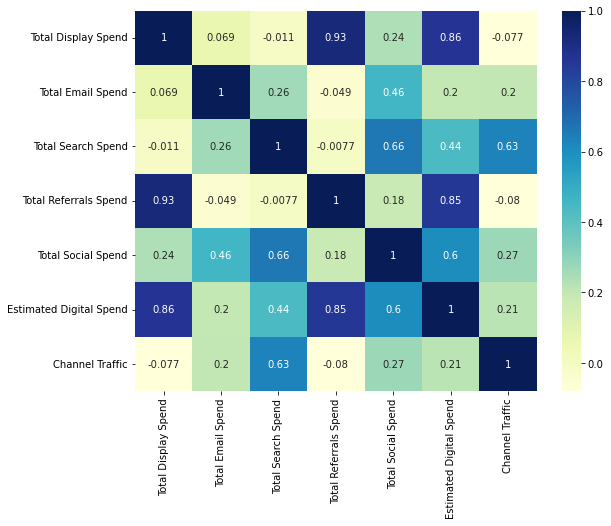

In [10]:
# setting the dimensions of the plot
plt.figure(figsize=(9,7))

data_heatmap = sns.heatmap(df_total.corr(), cmap="YlGnBu", annot=True)

a. Search channel has big correlation for channel traffics, followed by Social and Email channel to contribute

b. Display and Referrals has opposite correlation for channel traffics, we have to pay attention to whether to use this channel for further marketing or not

## Build the model

the model using multivariate regression

In [12]:
# split X and y
X = df_total[['Total Display Spend', 'Total Email Spend', 'Total Search Spend',
       'Total Referrals Spend', 'Total Social Spend']]
y =df_total[['Channel Traffic']]

In [13]:
from sklearn import linear_model

In [14]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [15]:
print(regr.coef_)

[[ 0.00149368  0.12662071  0.05758108 -0.00138612 -0.01521814]]


## let's have some scenario here to find a strategy to distribut the marketing spending

first we need to know how much their monthly spending for digital marketing, so we can use it as a based for next monthly spending

In [20]:
df_total.mean()

Total Display Spend         26422.850606
Total Email Spend             551.948788
Total Search Spend          31409.323030
Total Referrals Spend       43157.011515
Total Social Spend          54512.850909
Estimated Digital Spend    187511.363636
Channel Traffic              3877.621177
dtype: float64

## First scenario

In [18]:
Estimated_Digital_Spend = 187511.363636 #average of estimated spending for last 3 years

In [19]:
# using percentage with highest traffics to study whether the traffics will increase
Display = Estimated_Digital_Spend*0.004
Email = Estimated_Digital_Spend*0.0001
Search = Estimated_Digital_Spend*0.4139
Referrals = Estimated_Digital_Spend*0.105
Social = Estimated_Digital_Spend*0.477

In [20]:
print("Estimated_Digital_Spend_for Display: ", Display)
print("Estimated_Digital_Spend_for Email: ", Email)
print("Estimated_Digital_Spend_for Search: ", Search)
print("Estimated_Digital_Spend_for Refferals: ", Referrals)
print("Estimated_Digital_Spend_for Social: ", Social)

Estimated_Digital_Spend_for Display:  750.045454544
Estimated_Digital_Spend_for Email:  18.7511363636
Estimated_Digital_Spend_for Search:  77610.95340894039
Estimated_Digital_Spend_for Refferals:  19688.69318178
Estimated_Digital_Spend_for Social:  89442.920454372


In [21]:
predicted_channel_traffics = regr.predict([[Display, Email, Search, Referrals, Social]])
predicted_channel_traffics

C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5933.05935055]])

the result increase 53% of traffics average for last  3 years, and not beat the highest traffics (6596)

## Second scenario

In [22]:
Display1 = Estimated_Digital_Spend*0.05
Email1 = Estimated_Digital_Spend*0.15
Search1 = Estimated_Digital_Spend*0.50
Referrals1 = Estimated_Digital_Spend*0.00
Social1 = Estimated_Digital_Spend*0.30

In [26]:
predicted_channel_traffics1 = regr.predict([[Display1, Email1 , Search1, Referrals1, Social1]])
predicted_channel_traffics1

C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10966.99659675]])

Percetage manipulation will increace the traffic up to 66% of highest traffics from the last 3 years

## Thrid scenario

In [27]:
Estimated_Digital_Spend = 187511.363636
Estimated_Digital_Spend_up20 = 187511.363636+(187511.363636*0.2)
Estimated_Digital_Spend_up20

225013.6363632

In [28]:
Display2 = Estimated_Digital_Spend_up20*0.05
Email2 = Estimated_Digital_Spend_up20*0.15
Search2 = Estimated_Digital_Spend_up20*0.50
Referrals2 = Estimated_Digital_Spend_up20*0.00
Social2 = Estimated_Digital_Spend_up20*0.30

In [29]:
predicted_channel_traffics2 = regr.predict([[Display2, Email2 , Search2, Referrals2, Social2]])
predicted_channel_traffics2

C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12590.5782682]])

Percetage manipulation and with increasing the spending will grow the traffic up to 90% of highest traffics from the last 3 years

## Refferences:

https://www.sciencedirect.com/topics/social-sciences/multiple-regression#:~:text=Multiple%20regression%20is%20a%20statistical,of%20the%20single%20dependent%20value.

https://www.w3schools.com/python/python_ml_multiple_regression.asp